In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
'''Bird population data'''
months = np.arange(1, 61)
sizes = np.array([10, 14, 47, 50, 60, 91, 118, 166, 119, 123, 109, 160, 168, 216, 240, 
                  232, 276, 331, 346, 348, 369, 405, 399, 410, 460, 400, 432, 458, 460, 478, 
                  472, 510, 510, 523, 594, 565, 634, 631, 671, 744, 782, 786, 773, 784, 842, 
                  888, 927, 898, 949, 979, 994, 1025, 1003, 962, 968, 991, 982, 959, 973, 974])

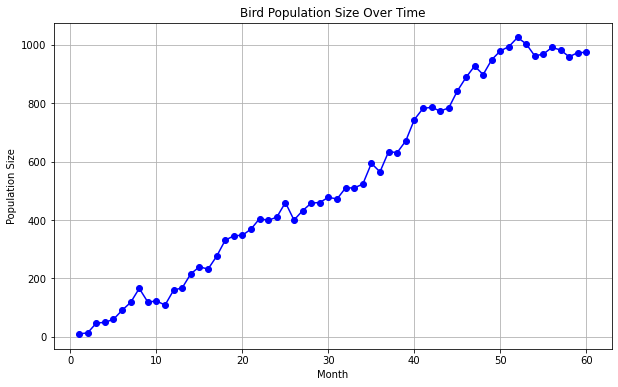

In [4]:
'''Task (a): Plot the data'''
plt.figure(figsize=(10, 6))
plt.plot(months, sizes, marker='o', color='blue', label='Observed bird population')
plt.title("Bird Population Size Over Time")
plt.xlabel("Month")
plt.ylabel("Population Size")
plt.grid(True)
plt.savefig('fig1.eps',format='eps')

Normality Test Result: NormaltestResult(statistic=0.902100449397704, pvalue=0.6369588503081604)


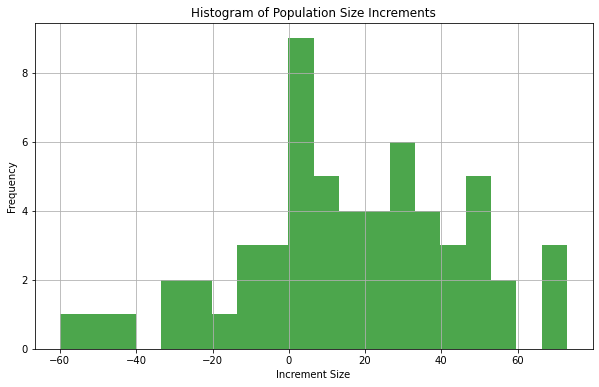

In [7]:
'''Task (b): Compute the increments and construct a histogram'''
increments = np.diff(sizes)
plt.figure(figsize=(10, 6))
plt.hist(increments, bins=20, color='green', alpha=0.7)
plt.title("Histogram of Population Size Increments")
plt.xlabel("Increment Size")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('fig2.pdf',format='pdf')
normality_test = stats.normaltest(increments)
print("Normality Test Result:", normality_test)

In [8]:
'''Task (c): Estimate the drift and volatility coefficients'''
n = len(sizes)
dt = 1  # each increment represents 1 month
mu = np.mean(increments) / dt
sigma = np.std(increments) / np.sqrt(dt)
print("Estimated Drift (mu):", mu)
print("Estimated Volatility (sigma):", sigma)

Estimated Drift (mu): 16.338983050847457
Estimated Volatility (sigma): 29.036861534597257


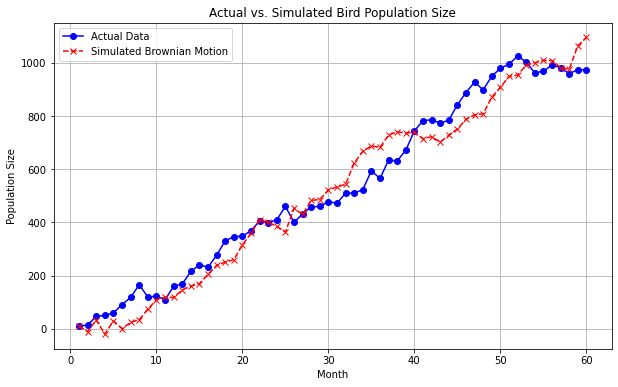

In [9]:
'''Task (d): Simulate a Brownian motion'''
def simulate_brownian_motion(mu, sigma, dt, n, initial_value):
    random_increments = np.random.normal(mu * dt, sigma * np.sqrt(dt), n)
    return np.cumsum(random_increments) + initial_value

initial_value = sizes[0]
simulated_path = simulate_brownian_motion(mu, sigma, dt, n - 1, initial_value)
simulated_path_with_initial = np.insert(simulated_path, 0, initial_value)

plt.figure(figsize=(10, 6))
plt.plot(months, sizes, marker='o', color='blue', label='Actual Data')
plt.plot(months, simulated_path_with_initial, marker='x', color='red', linestyle='--', label='Simulated Brownian Motion')
plt.title("Actual vs. Simulated Bird Population Size")
plt.xlabel("Month")
plt.ylabel("Population Size")
plt.legend()
plt.grid(True)
plt.savefig('fig3.pdf',format='pdf')